In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df=pd.read_csv('loan_prediction.csv')
df=pd.DataFrame(df)

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have data feed in the columns that are name above.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We have data set of 614 rows and 13 columns, data consist of object float and one column of integer. We have null values present in data set.

In [6]:
df.shape

(614, 13)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We have null values present in Gender, Married, Dependents, Self_employed, LoanAmoaunt, Loan_amount_term, Credit_History.

ApplicantIncome         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
CoapplicantIncome    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
LoanAmount           AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Loan_Amount_Term     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Credit_History       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
dtype: object

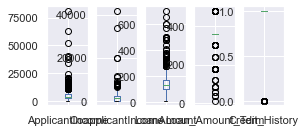

In [8]:
df.plot(kind='box',subplots=True, layout=(2,7))

We observe that there are outliers in Application Income, co applicant Income, LoanAmount, Loan_Amount_Term and credit_history has few outliers.

In [9]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

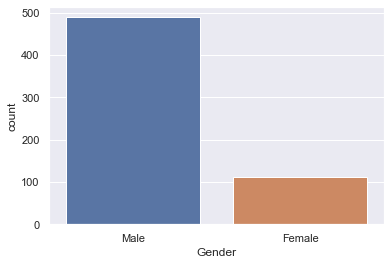

In [10]:
sns.countplot(x = "Gender", data = df)

We have data of 489 Male and 112 Female.

In [11]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

We have 398 Married and 213 not married.

<AxesSubplot:xlabel='Married', ylabel='count'>

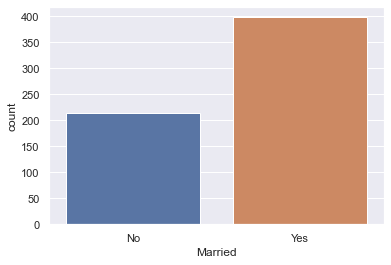

In [12]:
sns.countplot(x='Married',data=df)

In [13]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

We have data of Dependents. There are 345 with Zero dependent, 102 with one dependent, 101 with 2 dependent,  51 users have 3+ dependents.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

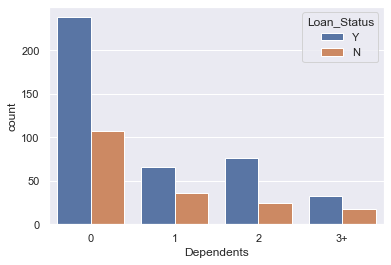

In [14]:
sns.countplot(df['Dependents'],hue=df['Loan_Status'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

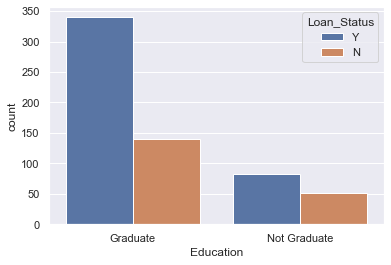

In [15]:
sns.countplot(df['Education'],hue=df['Loan_Status'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

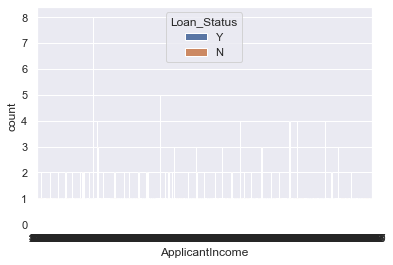

In [16]:
sns.countplot(df['ApplicantIncome'],hue=df['Loan_Status'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

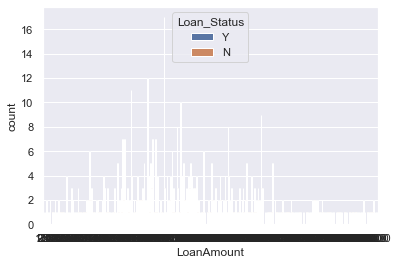

In [17]:
sns.countplot(df['LoanAmount'],hue=df['Loan_Status'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

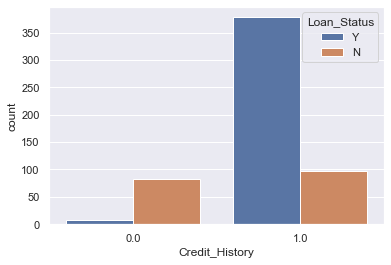

In [18]:
sns.countplot(df['Credit_History'],hue=df['Loan_Status'])

We have observe that People with 1.0 as credit history have more count of loan_status while people with 0.0 Credit History have negligible 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

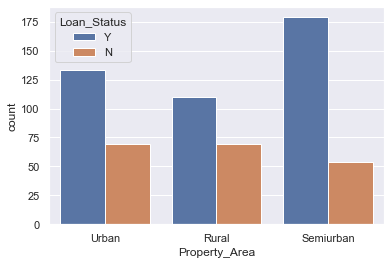

In [19]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

Property in area semiurban area have high count of loan statuscompared to Urban and Rural, however thing to note is all localities are getting loan his maximum.

We will use lable Encoder to convert string data from data set.

In [20]:
def remove_punctuation(x):
    try:
        x=x.str.replace('[^\w\s\+]','')
    except:
            pass
    return x
df.apply(remove_punctuation)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


We have removed the special charecter present in data set df.

We have some missing values in Gender, we will replace these missing values with mode values.

In [21]:
df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0])

In [22]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df['Gender']=LE.fit_transform(df['Gender'])
df 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [24]:
df['Married']= df['Married'].fillna(df['Married'].mode()[0])

In [25]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [26]:
df['Dependents']= df['Dependents'].fillna(df['Dependents'].mode()[0])


In [27]:
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])

In [28]:
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [29]:
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [30]:
df['Self_Employed']= df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

We have filled the missing values.

In [31]:
df['Married']=LE.fit_transform(df['Married'])
df                                                                             # Converting object data to integer.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [32]:
df['Education']=LE.fit_transform(df['Education'])

In [33]:
df['Self_Employed']=LE.fit_transform(df['Self_Employed'])

In [34]:
df['Property_Area']=LE.fit_transform(df['Property_Area'])

In [35]:
df['Dependents']=LE.fit_transform(df['Dependents'])

In [36]:
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [37]:
df['Loan_ID']= df['Loan_ID'].fillna(df['Loan_ID'].mode()[0])

In [38]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [39]:
df['Loan_ID']=LE.fit_transform(df['Loan_ID'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


We will check the skewness of data set

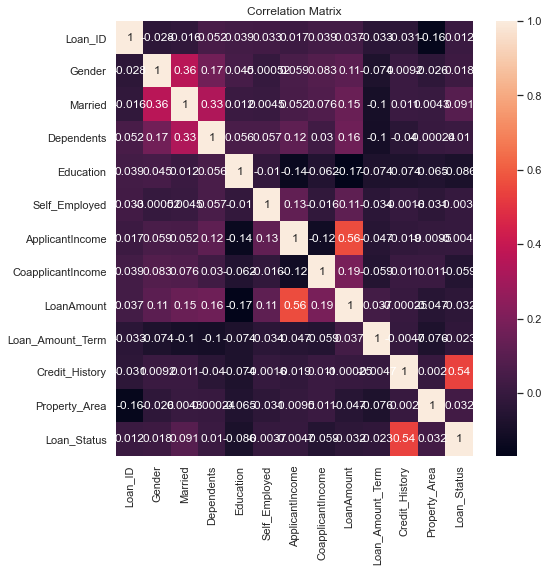

In [40]:
corr_mat=df.corr()
plt.figure(figsize=[8,8])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

We observe that the Loan status have direct relationship with loan status.

In [41]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [42]:
# Now we will treat skewness present in data using yeojohnson method.

from scipy.stats import yeojohnson

yf_target, lam = yeojohnson(df["Loan_Status"])

In [43]:
yf_target, lam = yeojohnson(df["Credit_History"])

In [44]:
yf_target, lam = yeojohnson(df["Loan_Amount_Term"])

In [45]:
yf_target, lam = yeojohnson(df["LoanAmount"])

In [46]:
yf_target, lam = yeojohnson(df["CoapplicantIncome"])

In [47]:
yf_target, lam = yeojohnson(df["ApplicantIncome"])

In [48]:
yf_target, lam = yeojohnson(df["Education"])

In [49]:
yf_target, lam = yeojohnson(df["Gender"])

In [50]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Model

Our target is Loan_Status. Hence this is an example of Regression.

In [51]:
from sklearn.model_selection import train_test_split
y = df['Loan_Status']
x = df.drop('Loan_Status', axis = 1)

In [52]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [53]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)


(491, 12) (123, 12)
(491,) (123,)


We have the data split in ratio 2:8, where the dimension of data is (491, 12),(123,12), and Y is (491,) and (123,)

In [55]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [56]:
pred=lm.predict(x_test)
print('Prediction :',pred)
print('Actual value ', y_test)

Prediction : [0.77554864 0.68797519 0.81452103 0.83806223 0.76663859 0.15931831
 0.07976053 0.82761207 0.83724645 0.82273736 0.74811608 0.84683857
 0.86824211 0.12893426 0.84015127 0.67502442 0.73268507 0.73068884
 0.8417373  0.78510363 0.83429277 0.78716305 0.73779829 0.86203332
 0.78281629 0.78013677 0.83429541 0.80023058 0.11211559 0.74789146
 0.74214043 0.77025721 0.79086311 0.83380933 0.71822474 0.7490008
 0.77097093 0.83733454 0.85733108 0.66899399 0.77730401 0.8187218
 0.82985609 0.83670975 0.12495841 0.88452476 0.14253924 0.80739839
 0.84090416 0.65626575 0.82785246 0.85156097 0.77563607 0.07242377
 0.80415953 0.89793499 0.81067679 0.14254868 0.84745222 0.72448938
 0.6516715  0.82399573 0.68213241 0.1172576  0.15236745 0.8478831
 0.07801683 0.75148084 0.73893374 0.74966722 0.85388735 0.76443029
 0.83003052 0.85891675 0.76120928 0.71873596 0.80225176 0.72949655
 0.83101482 0.8226313  0.7993012  0.83749614 0.08509274 0.70047128
 0.83587065 0.73531874 0.70247638 0.84532805 0.83848

In [57]:
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
print('LinearRegression')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print("r2 score is ", r2_score(y_test,pred))
print('Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('Mean squared error is ',mean_squared_error(y_test,pred))

LinearRegression
Mean absolute error: 0.30452075782793037
r2 score is  0.2794105969615347
Root mean Squared Error: 0.3830135887559192
Mean squared error is  0.14669940917168836


In [62]:
print("lm_coefficeient is", lm.coef_)
print("lm_intercept is ", lm.intercept_)
print('Lm score is ',lm.score(x_train,y_train))

lm_coefficeient is [-1.57612833e-05 -3.72312865e-03  6.51430171e-02  7.91501264e-03
 -9.32356249e-02  1.21012356e-02  3.14506155e-07 -9.37394836e-06
 -1.24054924e-04 -1.56970763e-04  6.93917308e-01  7.27020216e-03]
lm_intercept is  0.14884211422411064
Lm score is  0.3132667100055807


In [63]:
from sklearn.model_selection  import cross_val_score as cvs
def cross_val(model_name,model,x,y,cv):
    
    scores = cvs(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [64]:
cross_val(lm,LinearRegression(),x,y,5)

LinearRegression() Scores:
0.3
0.13
0.24
0.4
0.27
Average LinearRegression() score: 0.2689


In [65]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

In [66]:
predrf=RF.predict(x_test)
print('RF Prediction :',predrf)
print('Actual value ', y_test) 

RF Prediction : [0.64513133 0.64992348 0.69500139 0.71520061 0.67793082 0.67075999
 0.65720578 0.67799745 0.6788145  0.6565384  0.68471326 0.70149308
 0.70285294 0.67047299 0.6584055  0.67635568 0.71014771 0.66912972
 0.67831628 0.67192552 0.68715388 0.68451596 0.68543918 0.68531024
 0.6713189  0.6793971  0.71513018 0.68618674 0.70051472 0.69083578
 0.690856   0.64064892 0.64191946 0.68193282 0.68413648 0.6831621
 0.70275621 0.67859683 0.71169357 0.66548005 0.65127342 0.69801262
 0.67117195 0.69883256 0.70242407 0.67075999 0.67944672 0.68613996
 0.70126028 0.6922212  0.70672714 0.6700099  0.65109673 0.67769839
 0.69813852 0.68840854 0.72579328 0.68957634 0.67075999 0.65758035
 0.67064882 0.67928089 0.63822418 0.6750466  0.68446198 0.6959624
 0.69515328 0.69389802 0.68512565 0.66740215 0.68628581 0.65757187
 0.64851112 0.6815747  0.68613996 0.63862295 0.68315777 0.68669218
 0.67447791 0.6853044  0.66247164 0.6948648  0.6818714  0.67181426
 0.69354202 0.67246607 0.6713755  0.69560513 0.7

In [67]:
print('RandomForestRegressor')
print('RF Mean absolute error:',mean_absolute_error(y_test,predrf))
print("RF r2 score is ", r2_score(y_test,predrf))
print('RF Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('RF Mean squared error is ',mean_squared_error(y_test,predrf))

RandomForestRegressor
RF Mean absolute error: 0.4206537907869019
RF r2 score is  -0.0021903746650067113
RF Root mean Squared Error: 0.4516950803718277
RF Mean squared error is  0.2040284456321119


In [68]:
cross_val(RF,RandomForestRegressor(),x,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.26
0.09
0.28
0.38
0.15
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.23


In [69]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.01)
#ls=Lasso(alpha=0.1) is adefault value
ls.fit(x_train,y_train)
print('Lasso Score is ',ls.score(x_train,y_train) )

Lasso Score is  0.3049554547498864


In [70]:
print('ls Mean absolute error:',mean_absolute_error(y_test,predrf))
print("ls r2 score is ", r2_score(y_test,predrf))
print('ls Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('ls Mean squared error is ',mean_squared_error(y_test,predrf))

ls Mean absolute error: 0.4206537907869019
ls r2 score is  -0.0021903746650067113
ls Root mean Squared Error: 0.4516950803718277
ls Mean squared error is  0.2040284456321119


In [71]:
cross_val(ls,Lasso(),x,y,5)

Lasso(alpha=0.01) Scores:
0.0
-0.0
-0.01
-0.01
-0.03
Average Lasso(alpha=0.01) score: -0.0105


.From above values we conclude that the Lasso is the best model as its Avg Lasso score and r2 score is -0.0105 and -0.0021

Hyper-parameter tunning

In [72]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    6.0s finished


In [73]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.26569889435721433
Best Params:  {'alpha': 0.01}


The best score for the lassso model with parameter alpha  is 0.2656.

In [74]:
import joblib
joblib.dump(grid_result,"Doctor Consultation.pkl")

['Doctor Consultation.pkl']

Saving the pkl file.